# **EMOTION DETECTION**

In [25]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/emotions-dataset-for-nlp/val.txt
/kaggle/input/emotions-dataset-for-nlp/test.txt
/kaggle/input/emotions-dataset-for-nlp/train.txt


In [26]:
df = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/train.txt",sep=";",
    names=["Description","Emotion"])
df.head(5)

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


# **DATA PRE-PROCESSING**

In [27]:
df['Emotion'].value_counts()

Emotion
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

In [28]:
df['label_num'] = df['Emotion'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise':5
})

df.head(5)

,Description,Emotion,label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.label_num,test_size=0.2)

In [30]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


In [31]:
y_train.value_counts()

label_num
0    4301
1    3748
2    1722
3    1523
4    1039
5     467
Name: count, dtype: int64

# **DATA VISUALIZATION**

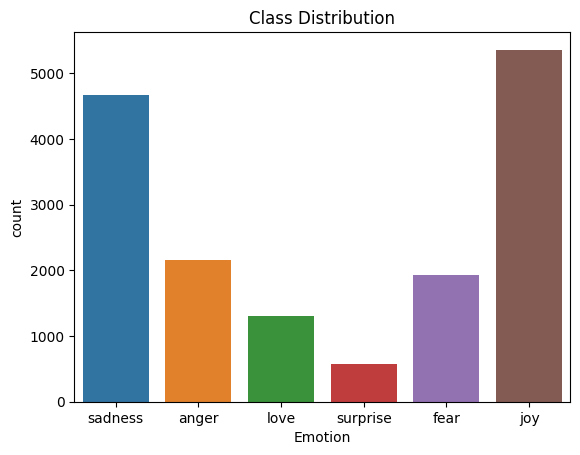

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Emotion', data=df)
plt.title('Class Distribution')
plt.show()


In [33]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [34]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)

In [35]:
df['processed_text'] = df["Description"].apply(preprocess)

In [36]:
df

,Description,Emotion,label_num,processed_text
0,i didnt feel humiliated,sadness,1,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,1,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,joy,0,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,2,feel like rude comment m glad t


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df.processed_text, 
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

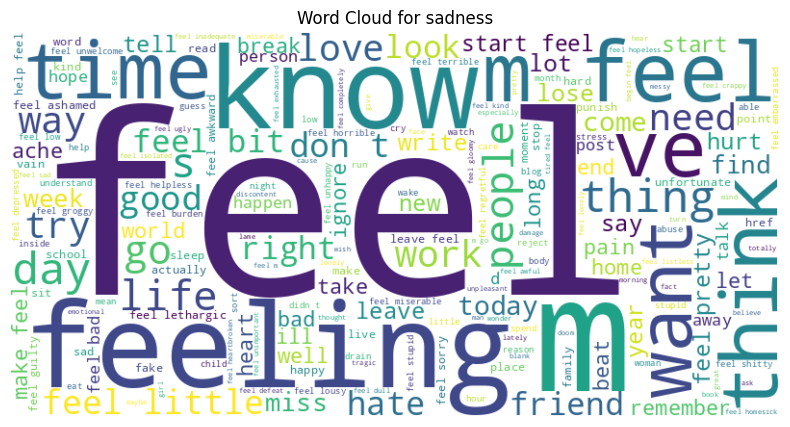

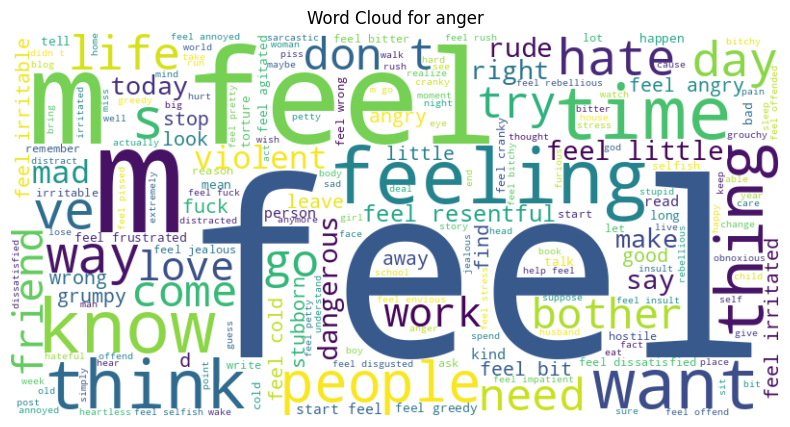

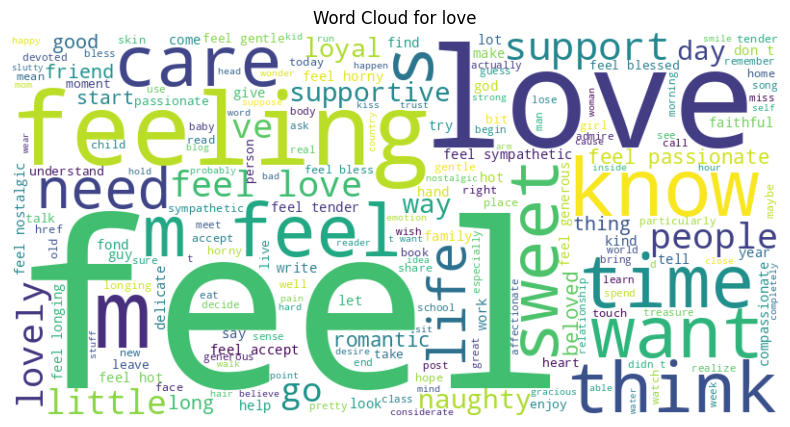

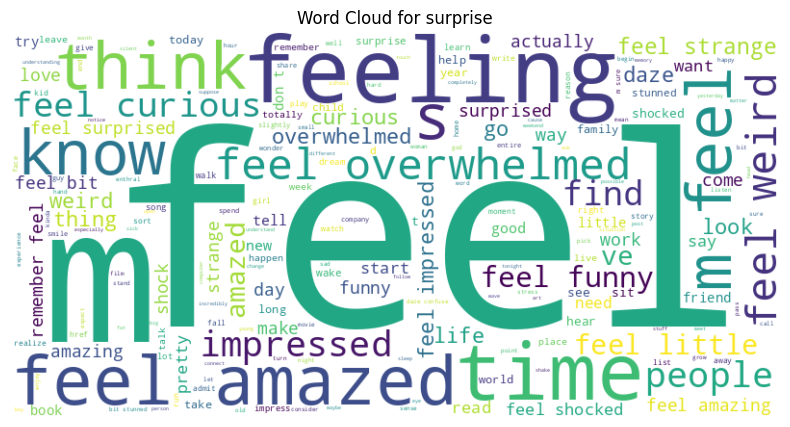

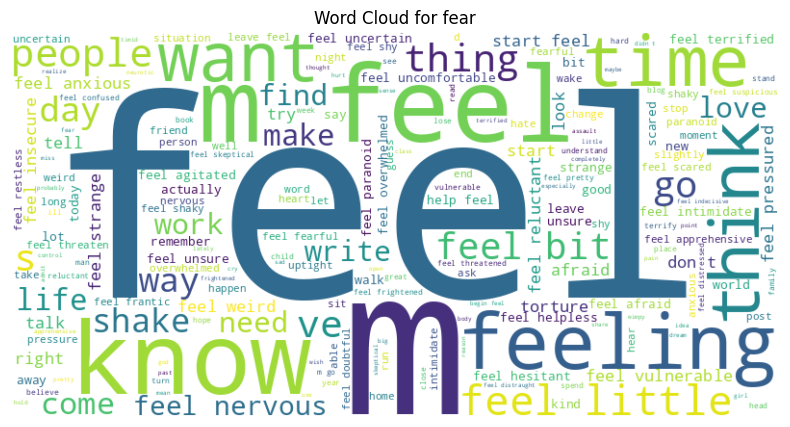

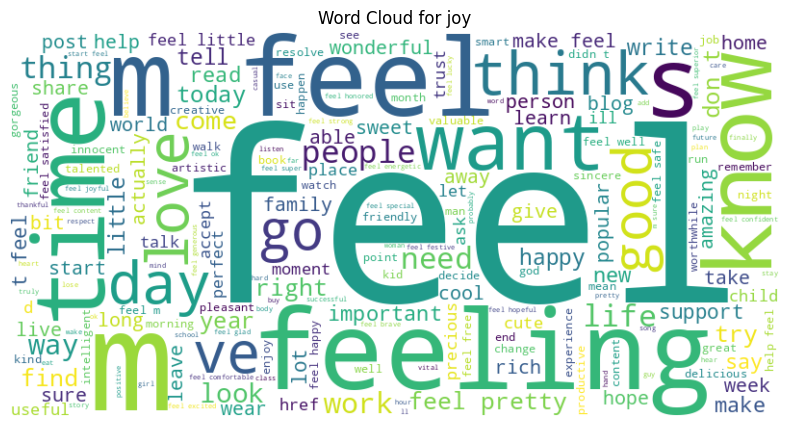

In [38]:
from wordcloud import WordCloud

emotions = df['Emotion'].unique()
for emotion in emotions:
    text = " ".join(df[df['Emotion'] == emotion]['processed_text'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {emotion}')
    plt.axis('off')
    plt.show()


# **MODEL TRAINING**

# **K NEAREST NEIGHBOUR CLASSIFIER**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1072
           1       0.78      0.84      0.81       933
           2       0.80      0.77      0.78       432
           3       0.84      0.69      0.76       387
           4       0.73      0.50      0.60       261
           5       0.73      0.57      0.64       115

    accuracy                           0.78      3200
   macro avg       0.78      0.71      0.73      3200
weighted avg       0.78      0.78      0.78      3200



# **NAIVE BAYES CLASSIFIER**

In [46]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()), 
     ('Multi NB', MultinomialNB())          
])

clf.fit(X_train, y_train)

y_pred_nb = clf.predict(X_test)

print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1072
           1       0.69      0.93      0.79       933
           2       0.93      0.38      0.53       432
           3       0.91      0.32      0.48       387
           4       1.00      0.08      0.14       261
           5       1.00      0.01      0.02       115

    accuracy                           0.69      3200
   macro avg       0.86      0.45      0.46      3200
weighted avg       0.77      0.69      0.63      3200



# **RANDOM FOREST CLASSIFIER**

In [47]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()), 
     ('Random Forest', RandomForestClassifier())         
])

clf.fit(X_train, y_train)

y_pred_rf = clf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1072
           1       0.89      0.88      0.89       933
           2       0.85      0.82      0.84       432
           3       0.80      0.81      0.81       387
           4       0.82      0.67      0.74       261
           5       0.80      0.64      0.71       115

    accuracy                           0.85      3200
   macro avg       0.83      0.79      0.81      3200
weighted avg       0.85      0.85      0.85      3200



# **MODEL COMPARISON**

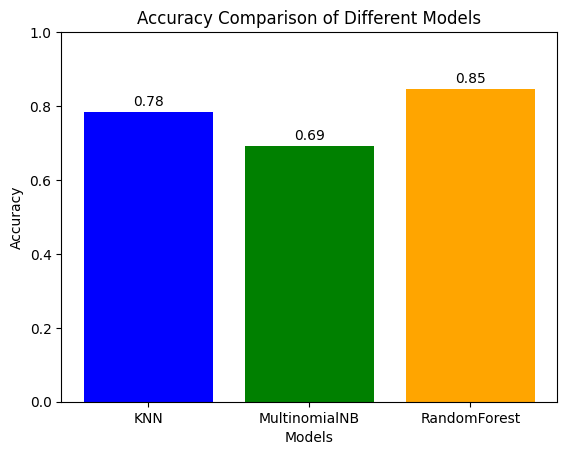

In [42]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

models = ['KNN', 'MultinomialNB', 'RandomForest']
accuracies = [accuracy_knn, accuracy_nb, accuracy_rf]

fig, ax = plt.subplots()
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim([0, 1])

for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(accuracy, 2), ha='center', va='bottom')

plt.show()


In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[926,  80,  23,   9,  30,   4],
       [ 89, 784,  30,  15,  12,   3],
       [ 43,  48, 332,   6,   3,   0],
       [ 46,  39,  17, 267,   1,  17],
       [ 77,  38,   9,   6, 131,   0],
       [ 17,  14,   3,  13,   2,  66]])

Text(95.72222222222221, 0.5, 'Truth')

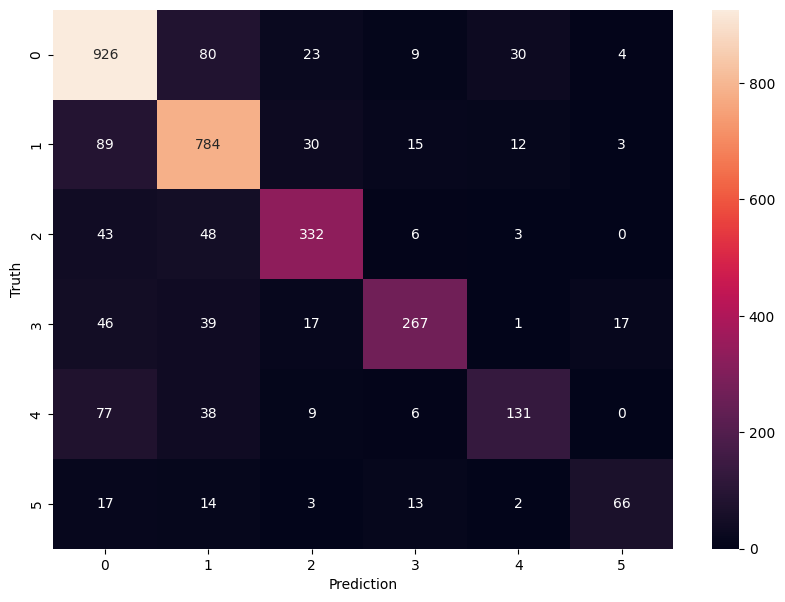

In [44]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# **PREDICTION**

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

X = df['processed_text']
y = df['label_num']

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X, y)

def predict_emotion(sentence):
    processed_sentence = preprocess(sentence)

    emotion_label = clf.predict([processed_sentence])[0]
    emotion_mapping = {0: 'joy', 1: 'sadness', 2: 'anger', 3: 'fear', 4: 'love', 5: 'surprise'}
    predicted_emotion = emotion_mapping[emotion_label]

    return predicted_emotion

def get_user_input():
    return "I am quite amazed with your results!"

user_input = get_user_input()
predicted_emotion = predict_emotion(user_input)
print(f"The predicted emotion for the sentence is: {predicted_emotion}")


The predicted emotion for the sentence is: surprise
